# Federico Andrucci - 0001058695

In [90]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Variables
file_name = 'ML-Python-Lab-Data.csv'
separator = ','
random_state = 42
target = 'Rings'

header = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

# Directives
%matplotlib inline
np.random.seed(random_state)

# 1. Load the data file and explore the data, showing size, data descriptions, data distributions with boxplot, pairplots

In [80]:
# Loading the data
df = pd.read_csv(file_name, delimiter=separator, names=header, index_col=0)

# explore the data
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.514,0.2245,0.1010,0.150,2.0
1,M,0.350,0.265,0.090,NaN,0.0995,0.0485,0.070,0.0
2,F,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,1.0
3,M,0.440,0.365,0.125,0.516,0.2155,0.1140,0.155,1.0
4,I,0.330,0.255,0.080,0.205,0.0895,0.0395,0.055,0.0


Showing the size of the data

In [70]:
print(f"In the dataser there are {df.shape[0]} rows and {df.shape[1]} columns")

In the dataser there are 4177 rows and 9 columns


Show data descriptions

In [71]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3997.000000,3976.000000,3987.000000,3990.000000,3983.000000,4002.000000,3990.000000,4177.000000
mean,0.525330,0.408448,0.139669,0.830577,0.360681,0.180995,0.239796,0.861623
std,0.119569,0.098728,0.041988,0.490629,0.221100,0.109425,0.139765,0.762510
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000
25%,0.450000,0.350000,0.115000,0.444500,0.188000,0.094000,0.130000,0.000000
50%,0.545000,0.425000,0.140000,0.802250,0.339000,0.171500,0.235000,1.000000
75%,0.615000,0.480000,0.165000,1.154375,0.503250,0.253500,0.330000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,3.000000


Showing data distribution with boxplot and pairplot

<AxesSubplot:>

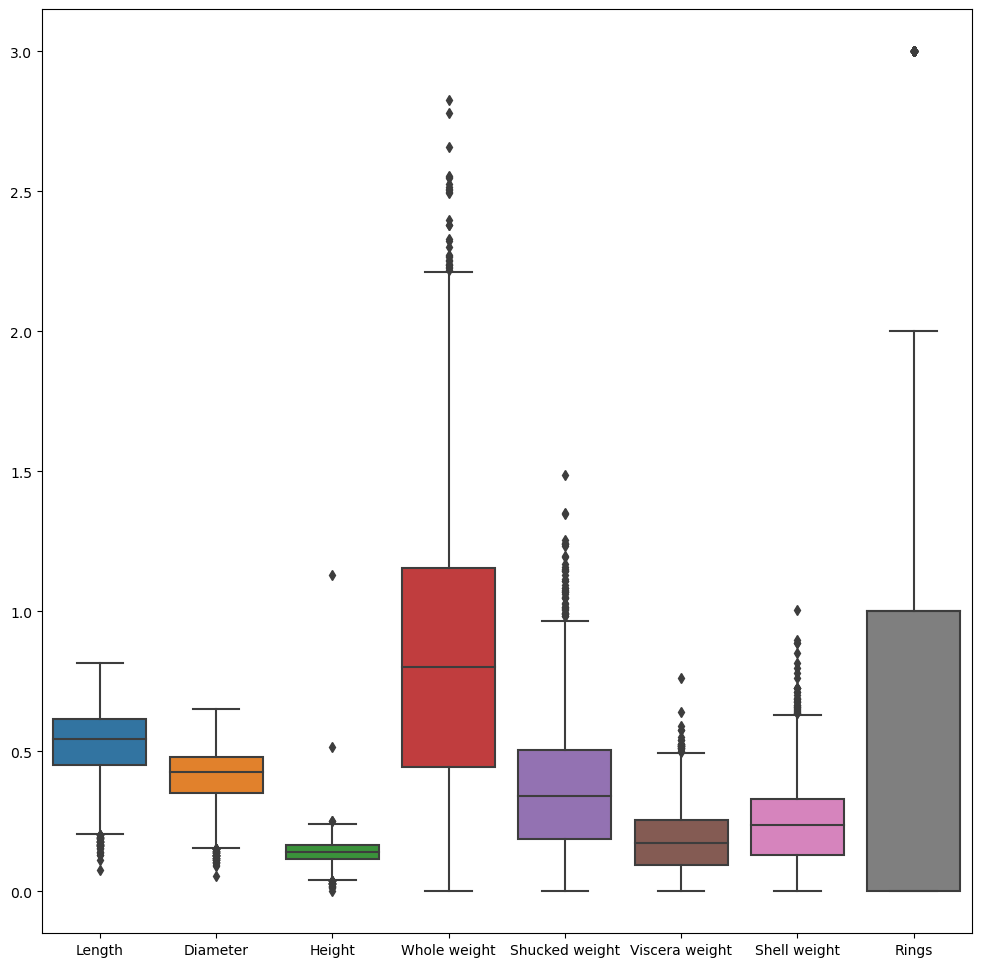

In [62]:
# produce the boxplots
plt.figure(figsize=(12, 12))
sns.boxplot(df)

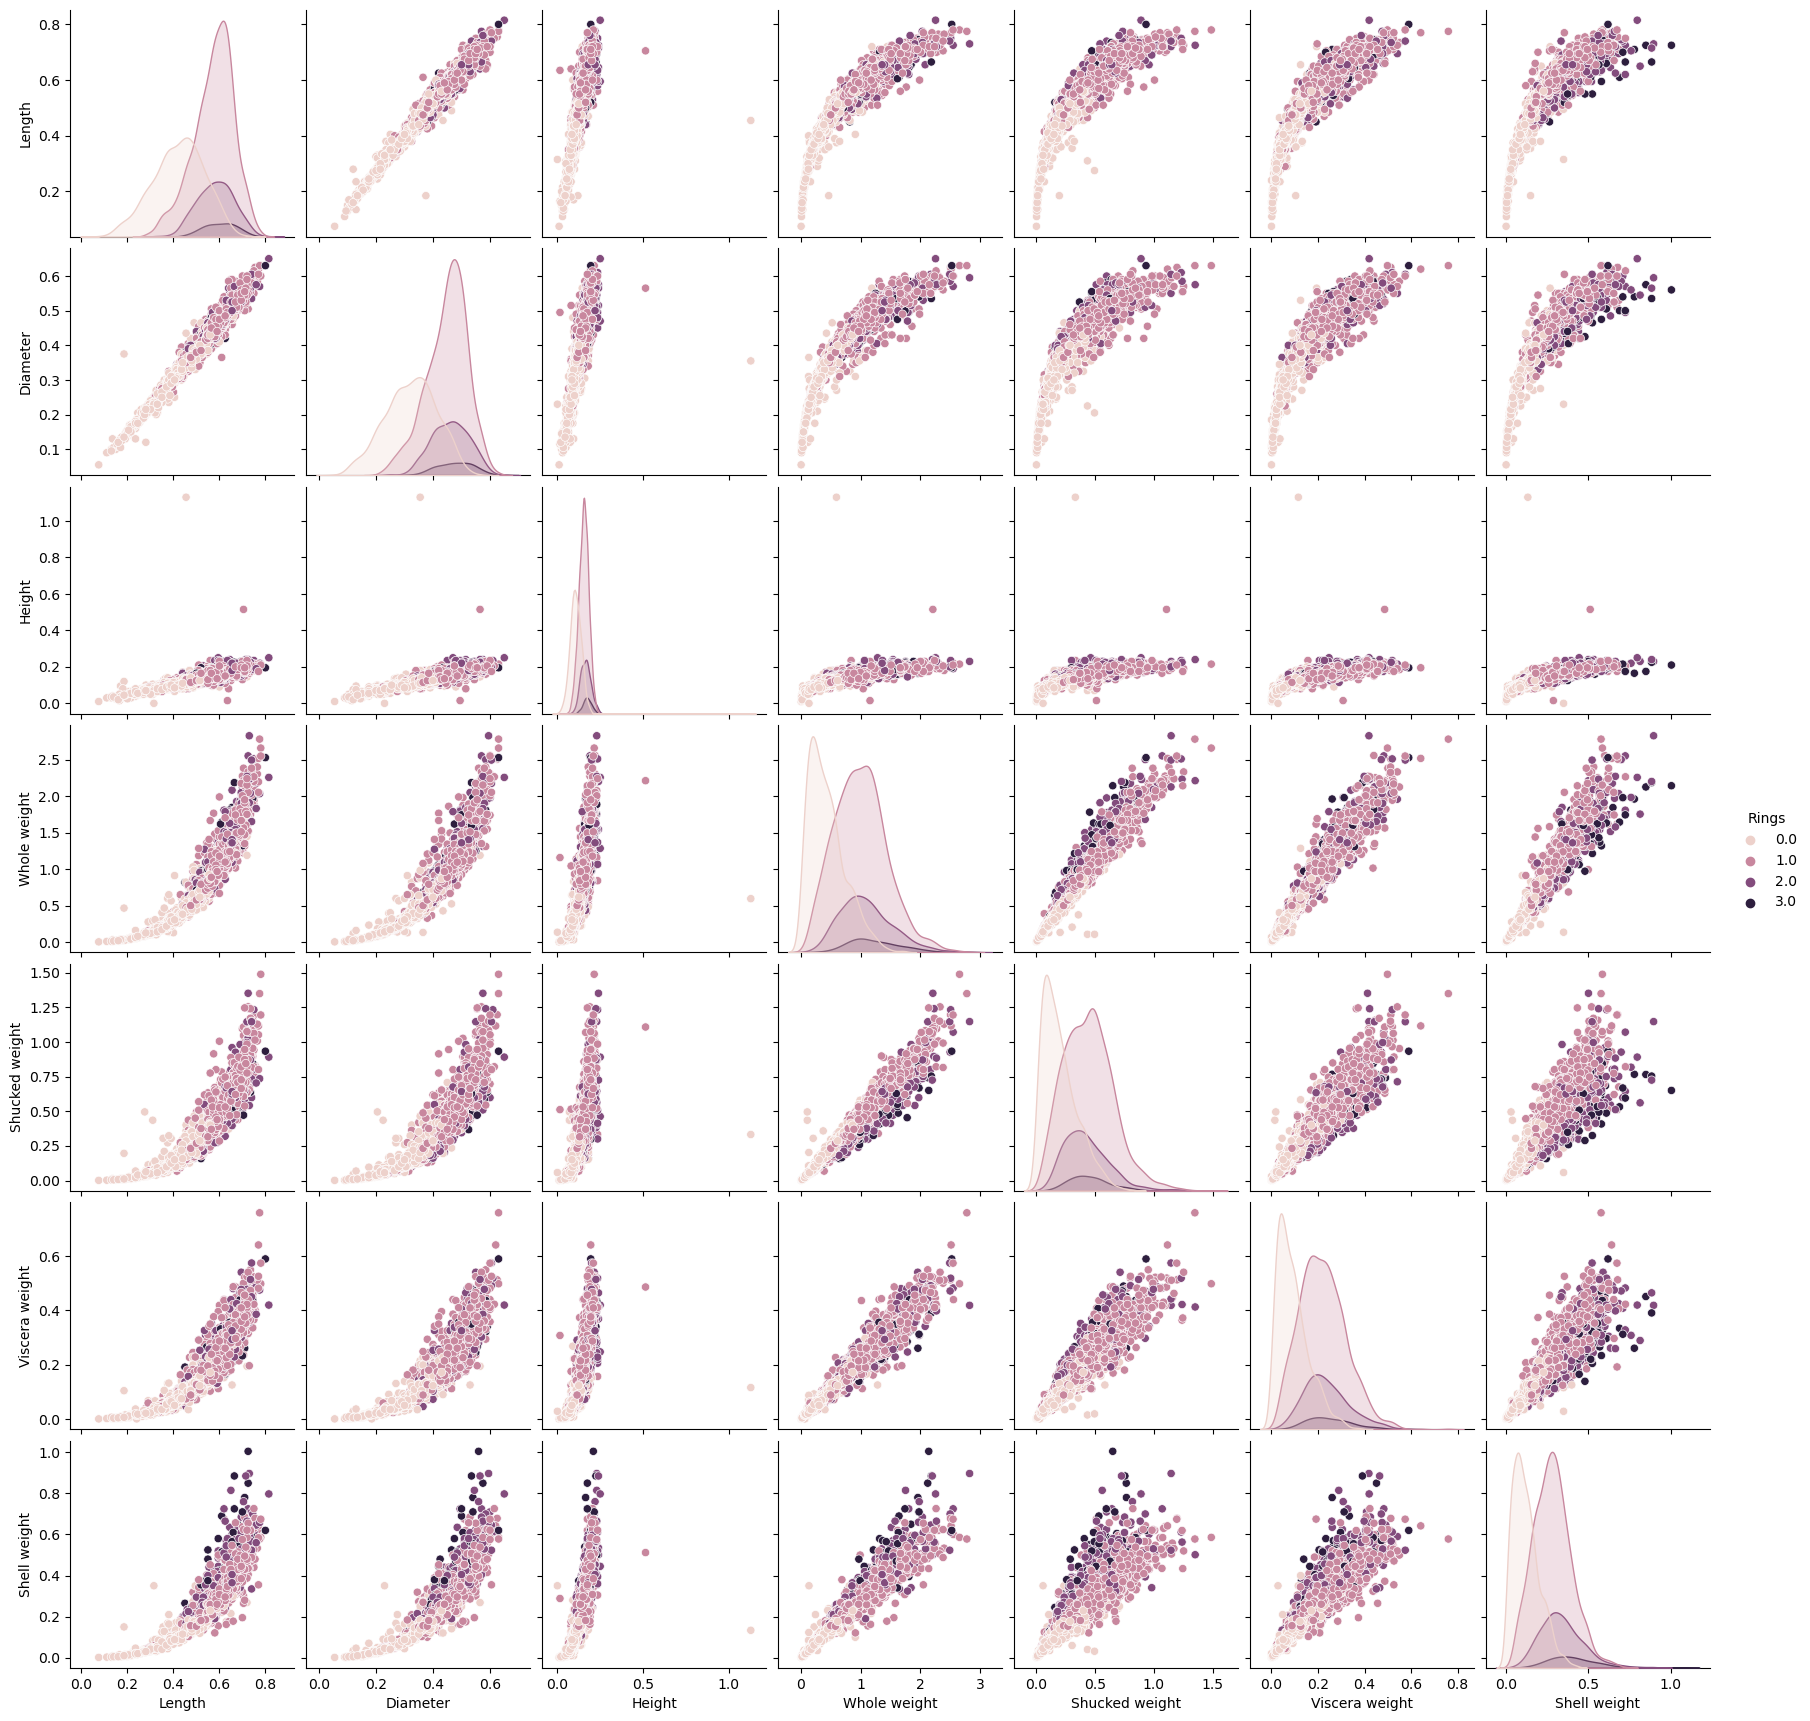

In [63]:
# Produce the pairplot
sns.pairplot(df, hue=target)

# 2. Comment the exploration of step 1 pointing out if there are imbalanced distributions, outliers, missing values

The first thing we can say watching at the head of the dataframe is that there are some missing value, so later on we must eliminate the rows with missing values.

The, looking at the boxplot, we can say that the features from 'Height' to 'Shell weight' have a lot of outliers. And then looking at the pairplot, the  features from 'Height' to 'Shell weight' have an imbalanced distribution that tend to be on the left part of the plot.

# 3. Drop the columns that are not relevant for the classification operation, if any, and explain why you do that. Deal with missing values, if any

In this dataset, the first column ('Index') has been removed during the loading of the dataset

In [81]:
# Since there are some missing values, we must to remove it with Pandas's .dropna() function
df = df.dropna()

Transform the sex column in integer representation

In [82]:
df['Sex'].replace({'M': 0, 'F':1, 'I':2}, inplace=True)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,2.0
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1.0
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.0
5,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,0.0
6,1,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,3.0


# 4. find the best classification scheme considering two classification methods, find the best hyperparameters using cross validation; the optimization must be focused on the f1_macro measure

In order to do this job i will use the `DecisionTreeClassifie` and `KNearest Neighbors`

First of all i will split the features matrix from the class label

In [83]:
X = df.drop(target, axis=1)
y = df[target]

And then i can split the data into tran and test sets with `train_test_split()` function.

In [84]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=random_state)

### Decision Tree

In [85]:
# instantiating DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=random_state)

# fit it to the training data
dt.fit(Xtrain, ytrain)

# try to predict trainig data
dt_train_prediction = dt.predict(Xtrain)

# try to predict test data
dt_test_prediction = dt.predict(Xtest)

# compute the accuracy scores
dt_train_accuracy = accuracy_score(ytrain, dt_train_prediction) * 100
dt_test_accuracy = accuracy_score(ytest, dt_test_prediction) * 100

### K-nearest Neighbors

In [86]:
# Instantiate the KNN classifier 
knn = KNeighborsClassifier()

# Fit it to the training set
knn.fit(Xtrain, ytrain)

# Try to predicti training data
knn_train_prediction = knn.predict(Xtrain)

# Try to predict test data
knn_test_prediction = knn.predict(Xtest)

# compute the accuracy score
knn_train_accuracy = accuracy_score(ytrain, knn_train_prediction) * 100
knn_test_accuracy = accuracy_score(ytest, knn_test_prediction) * 100

Let's see how well the classifiers have performed using their default hyperparameters

In [87]:
print(f"The decision tree had an accuracy of {dt_train_accuracy:.2f} on the training set and {dt_test_accuracy:.2f} on the test set")
print(f"The knn classifier had an accuracy of {knn_train_accuracy:.2f} on the training set and {knn_test_accuracy:.2f} on the test set")

The decision tree had an accuracy of 100.00 on the training set and 58.06 on the test set
The knn classifier had an accuracy of 73.96 on the training set and 66.58 on the test set


### Find the best parameter using crossvalidation, focussing on the f1_macro measure

In [88]:
model_lbls = [
              'dt', 
             'knn',
            ]

score = 'f1_macro'

# Set the parameters by cross-validation
tuned_param_dt = [{'max_depth': list(range(1,dt.get_depth() + 1)), 'random_state': [random_state]}]
tuned_param_knn =[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

models = {
    'dt': {'name': 'Decision Tree       ',
           'estimator': DecisionTreeClassifier(), 
           'param': tuned_param_dt,
          },
    'knn':{'name': 'K Nearest Neighbor ',
           'estimator': KNeighborsClassifier(),
           'param': tuned_param_knn
       },
}

In [91]:
def print_results(model):
    print("Best parameters set found on train set:")
    print()
    # if best is linear there is no gamma parameter
    print(model.best_params_)
    print()
    print("Grid scores on train set:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    params = model.cv_results_['params']
    for mean, std, params_tuple in zip(means, stds, params):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params_tuple))
    print()
    print("Detailed classification report for the best parameter set:")
    print()
    print("The model is trained on the full train set.")
    print("The scores are computed on the full test set.")
    print()
    y_true, y_pred = ytest, model.predict(Xtest)
    print(classification_report(y_true, y_pred))
    print()

We will now iterate on the models with GridSearchCV to find the best parameters

In [93]:
results_short = {}

for m in model_lbls:
    print('-'*40)
    print(f"Trying model {models[m]['name']}")
    clf = GridSearchCV(models[m]['estimator'], models[m]['param'], cv=5,
                        scoring='%s' % score,  
                        return_train_score = False,
                        n_jobs = 2,
                    )
    
    clf.fit(Xtrain, ytrain)
    print_results(clf)
    results_short[m] = clf.best_score_
    
print(f"Summary of results for {score}")
print("Estimator")
for m in results_short.keys():
    print(f"{models[m]['name']}\t - score: {results_short[m]*100}")

----------------------------------------
Trying model Decision Tree       
Best parameters set found on train set:

{'max_depth': 7, 'random_state': 42}

Grid scores on train set:

0.356 (+/-0.011) for {'max_depth': 1, 'random_state': 42}
0.356 (+/-0.011) for {'max_depth': 2, 'random_state': 42}
0.383 (+/-0.072) for {'max_depth': 3, 'random_state': 42}
0.434 (+/-0.042) for {'max_depth': 4, 'random_state': 42}
0.467 (+/-0.019) for {'max_depth': 5, 'random_state': 42}
0.462 (+/-0.022) for {'max_depth': 6, 'random_state': 42}
0.479 (+/-0.048) for {'max_depth': 7, 'random_state': 42}
0.469 (+/-0.060) for {'max_depth': 8, 'random_state': 42}
0.456 (+/-0.049) for {'max_depth': 9, 'random_state': 42}
0.462 (+/-0.047) for {'max_depth': 10, 'random_state': 42}
0.459 (+/-0.007) for {'max_depth': 11, 'random_state': 42}
0.459 (+/-0.052) for {'max_depth': 12, 'random_state': 42}
0.456 (+/-0.014) for {'max_depth': 13, 'random_state': 42}
0.449 (+/-0.027) for {'max_depth': 14, 'random_state': 42}
0.

# 5. Show the performance measures and the confusion matrices for the best hyperparameters of each model 

In [100]:
# best hyperparameters
best_depth = 7
best_n_neighbors = 1

Now i can instantiate the two models with the best hyperparameters

In [101]:
dt = DecisionTreeClassifier(max_depth=best_depth, random_state=random_state)
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)

### DecisionTree

In [102]:
dt.fit(Xtrain, ytrain)
dt_pred = dt.predict(Xtest)
dt_accuracy = accuracy_score(ytest, dt_pred)* 100
dt_cm = confusion_matrix(ytest, dt_pred)

print(f"The accuracy score of the DT classifier is {dt_accuracy:.2f}%")

The accuracy score of the DT classifier is 66.06%


Print the confusion matrix

In [103]:
print("The DT confusion matrix is:")
print(dt_cm)

The DT confusion matrix is:
[[159  59   1   0]
 [ 38 284  44   0]
 [  2  84  60   1]
 [  0  12  18   1]]


### KNN

In [104]:
knn.fit(Xtrain, ytrain)
knn_pred = knn.predict(Xtest)
knn_accuracy = accuracy_score(ytest, knn_pred)* 100
knn_cm = confusion_matrix(ytest, knn_pred)

print(f"The accuracy score of the KNN classifier is {knn_accuracy:.2f}%")

The accuracy score of the KNN classifier is 61.21%


Print the confusion matrix

In [105]:
print("The KNN confusion matrix is:")
print(knn_cm)

The KNN confusion matrix is:
[[158  56   5   0]
 [ 63 239  58   6]
 [ 13  61  67   6]
 [  1  11  16   3]]


# 6. Comment the results

As we can se from the result, after the crossvalidation focussed only to f1_macro, the DecisionTree has increased his performance, from 58.06% to 66.06%.

On the other hand, in the KNN classifier his accuracy has decreased from 66.58% to 61.21%.